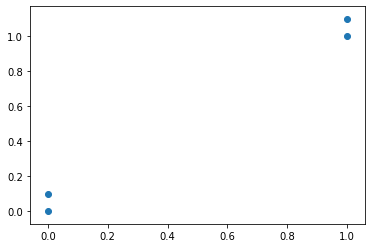

'B'

In [8]:
#p532

from numpy import array
import matplotlib
import matplotlib.pyplot as plt



from numpy import *
import operator
%matplotlib inline


def createDataSet():
    group=array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])  #훈련 셋
    labels=['A','A','B','B']             #labels
    return group, labels

group,labels=createDataSet()


fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(group[:,0],group[:,1])
plt.show()

#-----------------------k-최근접 이웃 알고리즘

def classify0(inX,dataSet,labels,k):
    dataSetSize=dataSet.shape[0]
    diffMat=tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    
    distances=sqDistances**0.5
    sortedDistIndicies=distances.argsort()
    classCount={}
    
   
    for i in range(k):
        votellabel=labels[sortedDistIndicies[i]]
        classCount[votellabel]=classCount.get(votellabel,0)+1
        
    sortedClassCount=sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)

    return sortedClassCount[0][0]
      
#---알고리즘 실행

classify0([0,0],group,labels,3)



In [9]:
#p534 knn 이용 데이터 사이트 만남주선 개선

from numpy import array
import matplotlib
import matplotlib.pyplot as plt

from numpy import *
import operator
%matplotlib inline

def file2matrix(filename):
    love_dictionary={'lageDoses':3,'smallDoses':2,'didntLike':1}
    fr=open(filename)
    array0Lines=fr.readlines()
    number0fLines=len(array0Lines)
    returnMat=zeros((number0fLines,3))
    classLabelVector=[]
    index=0
    
    for line in array0Lines:
        line=line.strip()
        listFromLine=line.split('\t')
        returnMat[index,:]=listFromLine[0:3]
        
       
      
        
        
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))

        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        
        index +=1
        
      
    return returnMat,classLabelVector
    
    
datingDataMat,datingLabels = file2matrix('C:/Users/Affinity/Desktop/lecture/datingTestSet.txt')
datingDataMat

datingLabels[0:20]              




[None, 2, 1, 1, 1, 1, None, None, 1, None, 1, 1, 2, 1, 1, 1, 1, 1, 2, None]

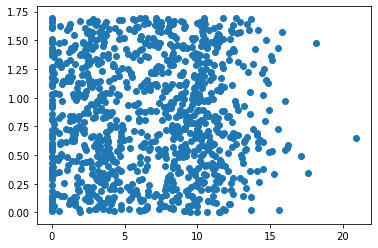

In [10]:
#p536  매스플롯라이브로리 scatter 플롯 생성

from numpy import array
import matplotlib
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

In [11]:
# 수치 정규화

def autoNorm(dataSet):
    minVals=dataSet.min(0)
    maxVals=dataSet.max(0)
    ranges=maxVals-minVals
    normDataSet=zeros(shape(dataSet))
    
    m=dataSet.shape[0]
    normDataSet=dataSet-tile(minVals,(m,1))
    normDataSet=normDataSet/tile(ranges,(m,1))
    
    return normDataSet,ranges,minVals
    
normMat,ranges,minVals=autoNorm(datingDataMat)

normMat



array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [13]:
# p538 knn 이용 전체 프로그램 분류기 테스트

def datingClassTest():
    hoRatio=0.10   # 확률
    
    datingDataMat,datingLabels= file2matrix('C:/Users/Affinity/Desktop/lecture/datingTestSet.txt')
    normMat,ranges,minVals=autoNorm(datingDataMat)
    
    m=normMat.shape[0]
    numTestVecs=int(m*hoRatio)
    errorCount=0.0
    
    for i in range(numTestVecs):
                            
            
        classifierResult=classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: {}".format(classifierResult,datingLabels[i]))
        
        if(classifierResult !=datingLabels[i]): errorCount +=1.0
        print("the total error rate is :{}".format(errorCount/float(numTestVecs)))
        print("the error count: {}".format(errorCount))
    
datingClassTest()


the classifier came back with: None
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 2
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: None
the total error rate is :0.0
the error count: 0.0
the classifier came back with: None
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: None
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error count: 0.0
the classifier came back with: 1
the total error rate is :0.0
the error cou

In [22]:
#538  모두에게 유용한시스템 만들기

def classifyPerson():
    resultList=['not at all',' in small','in lage doses']
    percenTats=float(input("percentage of time spent playing video games?"))
    ffMiles=float(input("frequent flier miles earned per year?"))
    iceCream=float(input("liters of ice cream consumed per year? "))
    
    dataingDataMat,datingLabels= file2matrix('C:/Users/Affinity/Desktop/lecture/datingTestSet.txt')
    
    normMat,ranges,minVals=autoNorm(datingDataMat)
    inArr=array([ffMiles,percenTats,iceCream,])
    
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    
    print("You will probably like this person: {}".format(resultList[classifierResult-1]))
    
classifyPerson()


percentage of time spent playing video games?1
frequent flier miles earned per year?1000
liters of ice cream consumed per year? 1
You will probably like this person:  in small


In [27]:
#p550  decision Tree  엔트로피

from math import log
import operator

def createdataset():
    dataset=[[1,1,'yes'],
            [1,1,'yes'],
            [1,0,'no'],
            [0,1,'no'],
            [0,1,'no']]
    labels=['no surfacing', 'flippers']
   
    return dataset,labels

#---------------------------------엔트로피 구하기
def calcshannonent(dataset):
    numentries=len(dataset)
    labelcounts={}
    
    for featvec in dataset:
        currentlabel=featvec[-1]
        if currentlabel not in labelcounts.keys(): labelcounts[currentlabel]=0
        labelcounts[currentlabel]+=1

    shannonent=0.0
    
    for key in labelcounts:
        prob=float(labelcounts[key])/numentries
        shannonent -= prob*log(prob,2)
        
    return shannonent    

mydat,labels=createdataset()
calcshannonent(mydat)



0.9709505944546686

In [28]:
#p551  데이터 집합 분할

def splitdataset(dataset,axis,value):
    retdataset=[]
    for featvec in dataset:
        if featvec[axis]== value:
            reducedfeatvec=featvec[:axis]
            reducedfeatvec.extend(featvec[axis+1:])
            retdataset.append(reducedfeatvec)
     
    return retdataset

# 테스트

d=splitdataset(mydat,1,1)





In [31]:
#p552 데이터 분할시  가장 좋은 속성 선택

def choosebestfeaturetosplit(dataset):
    numfeatures=len(dataset[0])-1
    baseentropy=calcshannonent(dataset)
    bestinfogain=0.0 ; bestfeature = -1
        
    for i in range(numfeatures):
        
        featlist=[example[i] for example in dataset]
        uniquevals=set(featlist)
        newentropy=0.0
       
        for value in uniquevals:
            subdataset=splitdataset(dataset,i,value)
            prob=len(subdataset)/float(len(dataset))
            newentropy += prob * calcshannonent(subdataset)
        infogain=baseentropy-newentropy
        
        if(infogain>bestinfogain):
            bestinfogain=infogain
            bestfeature=i
 
    print(featlist)       
    print(uniquevals)
    return bestfeature

choosebestfeaturetosplit(mydat)



[1, 1, 0, 1, 1]
{0, 1}


0

In [40]:
#p553 재귀적으로 트리 만들기



def majoritycnt(classlist):
    classcount={}
    
    for vote in classlist:
        if vote not in classcount.keys(): classcount[vote]=0
        classcount[vote] += 1
    
    sortedclasscount=sorted(classcount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedclasscount[0][0]

def createtree(dataset,labels):
    classlist=[example[-1] for example in dataset]
  
    if classlist.count(classlist[0]) == len(classlist):
        return classlist[0]
    
    if len(dataset[0])==1 :
        return majoritycnt(classlist)
    
    bestfeat=choosebestfeaturetosplit(dataset)
   
    bestfeatlabel=labels[bestfeat]
    mytree = {bestfeatlabel:{}}
   
    del(labels[bestfeat])
    
    featvalues=[example[bestfeat] for example in dataset]
    uniquevals = set(featvalues)
    print("\n",mytree)
    for value in uniquevals:
        sublabels= labels[:]
        mytree[bestfeatlabel][value]= createtree(splitdataset(dataset,bestfeat,value),sublabels)
    
   
    return mytree
    
#-------------------분류기 테스트, 저장

def retrievetree(i):
    list0ftrees=[{'no surfacing': {0: 'no',1:{'flippers':{0:'no',1:'yes'}}}},
                 {'no surfacing':{0:'no',1:{'flippers':{0:{'head':{0:'no',1:'yes'}},1:'no'}}}}
                 
                                 ]
    return list0ftrees[i]

def classify(inputtree,featlabels,testvec):
    firststr=list(inputtree)[0]
    seconddict=inputtree[firststr]
    featindex=featlabels.index(firststr)
    
    key=testvec[featindex]
    
    value0ffeat=seconddict[key]
    print(value0ffeat)    
 
    if isinstance(value0ffeat,dict):
        classlabel= classify(value0ffeat,featlabels,testvec)
    
    else: classlabel=value0ffeat
    
    print(  classify(value0ffeat,featlabels,testvec)) 
    return classlabel

mydat,labels=createdataset()   #반복 실행 할때  주석 지우고 실행하고 다시 주석 달기
#mytree=retrievetree(0)




classify(mytree,labels,[1,0])



{'flippers': {0: 'no', 1: 'yes'}}
no


TypeError: string indices must be integers

In [37]:
#3 이해 #####################################################33
classify(mytree,labels,[1,0])

{'flippers': {0: 'no', 1: 'yes'}}
no


TypeError: string indices must be integers

In [ ]:
#선형 회귀

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#------------ 데이터 생성

np.random.seed(seed=1)   #난수 고정
x_min=4
x_max=30
x_n=16
x=5+25*np.random.rand(x_n)

prm_c=[170,108,0.2]   #생성 매개 변수

T=prm_c[0]-prm_c[1]*np.exp(-prm_c[2]*x)  +4 *np.random.randn(x_n)

np.savez('ch5_data.npz',x=x,x_min=x_min, x_max=x_max, x_n=x_n, T=T)

print(np.round(x,2))
print(np.round(T,2))
                                                            
                                                       
#----------데이터 그래프

plt.figure(figsize=(4,4))
plt.plot(x,T,marker= 'o', linestyle= 'None',markeredgecolor= 'black', color='cornflowerblue')

plt.xlim(x_min,x_max)
plt.grid(True)
plt.show()

In [ ]:
#p559 평균 제곱 오차

from numpy import array
import matplotlib
import matplotlib.pyplot as plt

from numpy import *
import operator
import numpy as np
import matplotlib.pyplot as plt

from math import log
import operator

from mpl_toolkits.mplot3d import Axes3D

#---------------평균 오차 함수


def mse_line(x,t,w):
    y=w[0]*x+w[1]
    mse=np.mean((y-t)**2)
    return mse

#----------계산

xn=100   # 등고선 표시 해상도

w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)

xx0,xx1= np.meshgrid(x0,x1)
j=np.zeros((len(x0),len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        j[i1,i0]=mse_line(x,T,(x0[i0],x1[i1]))
        
#--------------표시

plt.figure(figsize=(9.5,4))
plt.subplots_adjust(wspace=0.5)

ax=plt.subplot(1,2,1,projection='3d')
ax.plot_surface(xx0,xx1,j,rstride=10, cstride=10, alpha=0.3, color= 'blue', edgecolor='black')

ax.set_xticks([-20,0,20])
ax.set_yticks([120,140,160])
ax.view_init(20,-60)

plt.subplot(1,2,2)
cont=plt.contour(xx0,xx1,j,30,colors='black', levels=[100,1000,10000,100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
#p565 리니어 회귀  경사하강법

def dmse_line(x,t,w):
    y=w[0]*x+w[1]
    d_w0=2*np.mean((y-T)* x)
    d_w1=2*np.mean(y-T)
    return d_w0,d_w1

d_w=dmse_line(x,T,[10,165])
print(np.round(d_w,1))




In [ ]:
#p567 매개 변수 구하기 ---경사하강법

#--------경사 하강법
def fit_line_num(x,T):
    w_init=[10.0,165.0]  # 초기 매개 변수
    alpha=0.001   # 학습률
    
    i_max=100000  # 최대 반복수
    
    eps=0.1    #반복 종료 기울기의 절대값 한계
    
    w_i=np.zeros([i_max,2])
    w_i[0,:]=w_init
    
    for i in range(1,i_max):
        dmse= dmse_line(x,T,w_i[i-1])
        w_i[i,0]=w_i[i-1,0]- alpha * dmse[0]
        w_i[i,1]=w_i[i-1,1]- alpha * dmse[1]
        
        if max(np.absolute(dmse)) < eps :    #종료 판정
            break
            
    w0=w_i[i,0]
    w1=w_i[i,1]
    w_i=w_i[:i,:]
    return w0,w1,dmse,w_i

# -----------메인

plt.figure(figsize=(4,4))  #등고선 표시
xn=100     #등고선 해상도
w0_range=[-25,25]
w1_range=[120,170]
x0=np.linspace(w0_range[0],w0_range[1],xn)
x1=np.linspace(w1_range[0],w1_range[1],xn)

xx0,xx1 = np.meshgrid(x0,x1)

j=np.zeros((len(x0),len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        j[i1,i0]=mse_line(x,T,(x0[i0],x1[i1]))
cont=plt.contour(xx0,xx1,j,30,colors='black',levels=(100,1000,10000,100000))

cont.clabel(fmt='%1.0f',fontsize=8)
plt.grid(True)

#p568 경사 하강법 호출

w0,w1,dmse,w_history=fit_line_num(x,T)

#결과보기

print('반복 횟수 {0}'.format(w_history.shape[0]))
print('w=[{0:.6f},{1:.6f}]'.format(w0,w1))
print('dmse=[{0:.6f}]'.format(dmse[0],dmse[1]))
print('mse={0:.6f}'.format(mse_line(x,T,[w0,w1])))
print(w_history[:,0],w_history[:,1])
plt.plot(w_history[:,0],w_history[:,1],'.-' ,  color='gray', markersize=10, markeredgecolor='cornflowerblue')

plt.show()
            

In [ ]:
#p569 w0,w1을 직선 식에 대입

#----------선 표시

def show_line(w):
    xb=np.linspace(x_min,x_max,100)
    y=w[0]*xb+w[1]
    plt.plot(xb,y,color=(.5,.5,.5),linewidth=4)
    
#-------------메인

plt.figure(figsize=(4,4))
w=np.array([w0,w1])
mse=mse_line(x,T,w)
print("w0={0:.3f}, w1={1:.3f}". format(w0,w1))
print("SD={0:.3f} cm". format(np.sqrt(mse)))
show_line(w)

plt.plot(x,T,marker='o', linestyle='None', color='cornflowerblue', markeredgecolor='black')

plt.xlim(x_min,x_max)
plt.grid(True)
plt.show()